In [1]:
# standard Python packages for scientific computing:
import numpy as np  # Numerical Python
import matplotlib.pyplot as plt  # plotting
import math as m
import os  # operating system / file utilities
import sys
from copy import deepcopy
from Grid1DCartesian import *
from interpolation_scheme import *
from limiters import *
from ShallowWaterSim import *
import pstats
from pstats import SortKey
import cProfile
from examples import *
from ShallowWaterData import *
    
# from numba import jit
# first did "conda install numba".  See
# https://numba.readthedocs.io/en/stable/user/5minguide.html

In [2]:
# default figure size okay if notebook is zoomed for class presentation:
# plt.rcParams["figure.figsize"] = [6.4, 4.8] # default
plt.rcParams["figure.figsize"] = [8.0, 6.0]

In [3]:
# create a subdirectory to hold figures
# (if it doesn't exist already)
os.makedirs("../figs", exist_ok=True)

## Running ShallowWaterSim object

### Example from LeVeque (2002) Figure 13.1

In [4]:
pr = cProfile.Profile()
pr.enable()
run_sill()
pr.disable()

In [5]:
p = pstats.Stats(pr)
p.strip_dirs().sort_stats('tottime').print_stats(20)

         67199748 function calls (61980719 primitive calls) in 39.932 seconds

   Ordered by: internal time
   List reduced from 1445 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
5139219/316637    5.745    0.000   13.667    0.000 copy.py:132(deepcopy)
  1233936    2.888    0.000    6.524    0.000 Grid1DCartesian.py:141(__getitem__)
  2149055    2.659    0.000    2.659    0.000 {built-in method numpy.array}
   292248    2.337    0.000    2.337    0.000 minfunc.py:7(minmin)
   292248    2.266    0.000    4.604    0.000 minfunc.py:18(minmod)
    73062    1.782    0.000   12.943    0.000 ShallowWaterSim.py:221(_find_uL_uR)
   340992    1.649    0.000    2.882    0.000 Grid1DCartesian.py:41(set_value)
2070300/1778052    1.255    0.000    3.108    0.000 {method '__deepcopy__' of 'numpy.ndarray' objects}
  2752282    1.224    0.000    1.640    0.000 copy.py:252(_keep_alive)
     8118    1.111    0.000   35.575    0.004 ShallowWaterSim.

In [62]:
ls ../../clawpack/_output_sill/

fort.a0000    fort.pkl0006  fort.q0002    fort.q0009    fort.t0005
fort.pkl0000  fort.pkl0007  fort.q0003    fort.q0010    fort.t0006
fort.pkl0001  fort.pkl0008  fort.q0004    fort.t0000    fort.t0007
fort.pkl0002  fort.pkl0009  fort.q0005    fort.t0001    fort.t0008
fort.pkl0003  fort.pkl0010  fort.q0006    fort.t0002    fort.t0009
fort.pkl0004  fort.q0000    fort.q0007    fort.t0003    fort.t0010
fort.pkl0005  fort.q0001    fort.q0008    fort.t0004


In [27]:
cat ../../clawpack/_output_sill/fort.q0002

    1                  patch_number
    1                  AMR_level
  500                  mx
   -1.00000000e+00     xlow
    4.00000000e-03     dx

    1.04450557e+00   -1.43910435e-01
    1.04394338e+00   -1.42035470e-01
    1.04343227e+00   -1.40332189e-01
    1.04290470e+00   -1.38575220e-01
    1.04236336e+00   -1.36773674e-01
    1.04180923e+00   -1.34930902e-01
    1.04124330e+00   -1.33050326e-01
    1.04066657e+00   -1.31135297e-01
    1.04007998e+00   -1.29189097e-01
    1.03948450e+00   -1.27214940e-01
    1.03888103e+00   -1.25215972e-01
    1.03827050e+00   -1.23195264e-01
    1.03765380e+00   -1.21155820e-01
    1.03703178e+00   -1.19100573e-01
    1.03640531e+00   -1.17032390e-01
    1.03577522e+00   -1.14954068e-01
    1.03514232e+00   -1.12868331e-01
    1.03450741e+00   -1.10777832e-01
    1.03387127e+00   -1.08685149e-01
    1.03323466e+00   -1.06592789e-01
    1.03259833e+00   -1.04503189e-01
    1.03196298e+00   -1.02418714e-01
    1.03132934e+00   -1.00341656e-01

In [90]:
data = np.genfromtxt('../../clawpack/_output_sill/fort.q0000', skip_header = 6)

In [91]:
x = -1.00e0 + (np.arange(500) + 0.5) * 4e-3

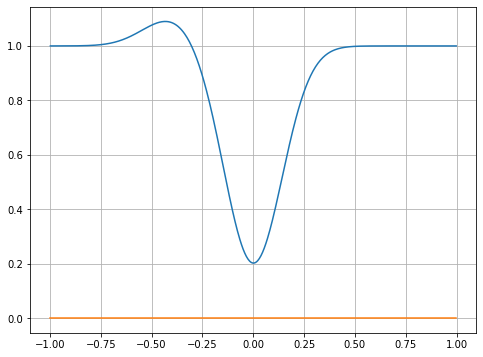

In [92]:
plt.plot(x,data[:,0])
plt.plot(x,data[:,1])
plt.grid()

In [84]:
cat ../../clawpack/_output_sill/fort.t0008

    8.00000000e-01     time
    2                  num_eqn
    1                  nstates
    1                  num_aux
    1                  num_dim


In [94]:
bata = np.genfromtxt('../../clawpack/_output_sill/fort.a0000', skip_header = 6)

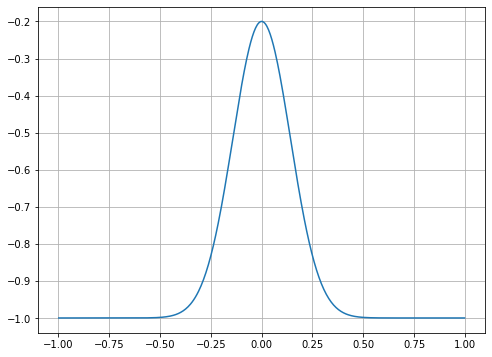

In [95]:
plt.plot(x, bata)
plt.grid()

In [130]:
z = 0 * bata - 1
where = np.where(np.abs(x) <= 0.92)[0]
z[where] = 0.8 * np.exp(-(x[where]/0.2)**2) - 1
#z = 0.8 * np.exp(-(x/0.2)**2) - 1

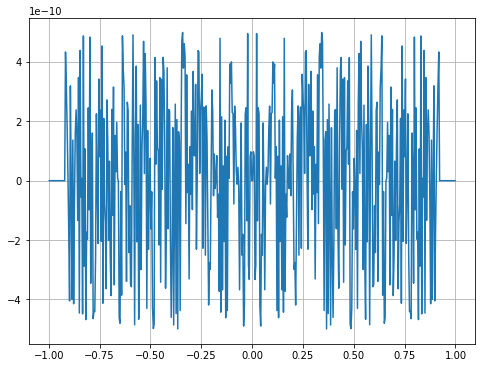

In [131]:
plt.plot(x, bata - z)
plt.grid()

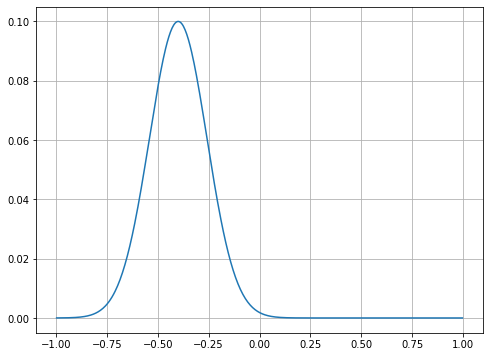

In [127]:
eta = data[:,0] + z
plt.plot(x, eta)
plt.grid()

In [140]:
eta_model = 0 * bata
where = np.where(np.abs(x+0.40) <= 3)[0]
eta_model[where] = 0.1 * np.exp(-((x[where]+0.40)/0.2)**2)

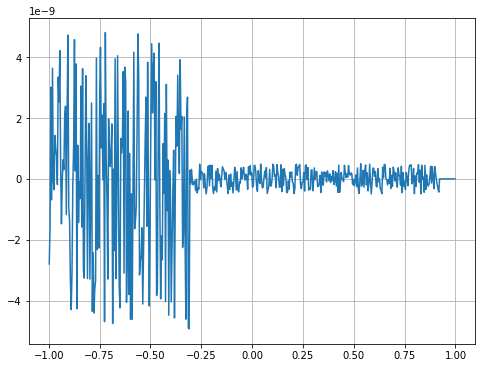

In [141]:
plt.plot(x, eta - eta_model)
plt.grid()

In [148]:
aa = np.genfromtxt('../output_Green_Law/files/data_106922.txt')

In [164]:
fin = open('../output_Green_Law/files/data_106922.txt','r')

In [169]:
string = fin.readline()
string

'# t     = 1080.0100056 s\n'

In [178]:
float(string.split()[3])

1080.0100056

In [162]:
fin.close()

In [163]:
cat ../output_Green_Law/files/data_106922.txt

# steps = 106922
# t     = 1080.0100056 s
# g     = 9.8000000 m/s^2
1.0000000e+01 -1.0000000e+00 2.4526284e-02 5.6020863e-04
3.0000000e+01 -1.5981743e+00 -2.0822780e-01 2.9221804e-03
5.0000000e+01 -2.2299862e+00 1.8275158e-01 -2.8606012e-03
7.0000000e+01 -2.9135483e+00 -1.8381065e-01 2.8622501e-03
9.0000000e+01 -3.6470123e+00 1.8103228e-01 -2.8055330e-03
1.1000000e+02 -4.4159622e+00 -1.7870995e-01 2.7851315e-03
1.3000000e+02 -5.2043184e+00 1.7595451e-01 -2.7293569e-03
1.5000000e+02 -6.0008938e+00 -1.7324218e-01 2.6975445e-03
1.7000000e+02 -6.8001328e+00 1.7022389e-01 -2.6413224e-03
1.9000000e+02 -7.6000126e+00 -1.6725412e-01 2.6024386e-03
2.1000000e+02 -8.4000006e+00 1.6403606e-01 -2.5453633e-03
2.3000000e+02 -9.2000000e+00 -1.6087758e-01 2.5017231e-03
2.5000000e+02 -1.0000000e+01 1.5751594e-01 -2.4438780e-03
2.7000000e+02 -1.0800000e+01 -1.5422370e-01 2.3970027e-03
2.9000000e+02 -1.1600000e+01 1.5076537e-01 -2.3386421e-03
3.1000000e+02 -1.2400000e+01 -1.4738516e-01 2.2896537e-03
3.300

1.0813000e+05 -4.0000000e+03 1.9850618e-02 9.8259591e-04
1.0815000e+05 -4.0000000e+03 1.9850243e-02 9.8247584e-04
1.0817000e+05 -4.0000000e+03 1.9847827e-02 9.8245938e-04
1.0819000e+05 -4.0000000e+03 1.9847360e-02 9.8234673e-04
1.0821000e+05 -4.0000000e+03 1.9844984e-02 9.8233210e-04
1.0823000e+05 -4.0000000e+03 1.9844591e-02 9.8221822e-04
1.0825000e+05 -4.0000000e+03 1.9842365e-02 9.8219941e-04
1.0827000e+05 -4.0000000e+03 1.9842093e-02 9.8208233e-04
1.0829000e+05 -4.0000000e+03 1.9839924e-02 9.8206145e-04
1.0831000e+05 -4.0000000e+03 1.9839541e-02 9.8195104e-04
1.0833000e+05 -4.0000000e+03 1.9837260e-02 9.8193802e-04
1.0835000e+05 -4.0000000e+03 1.9836816e-02 9.8183149e-04
1.0837000e+05 -4.0000000e+03 1.9834571e-02 9.8181560e-04
1.0839000e+05 -4.0000000e+03 1.9834199e-02 9.8170514e-04
1.0841000e+05 -4.0000000e+03 1.9832056e-02 9.8168555e-04
1.0843000e+05 -4.0000000e+03 1.9831771e-02 9.8157136e-04
1.0845000e+05 -4.0000000e+03 1.9829625e-02 9.8154834e-04
1.0847000e+05 -4.0000000e+03 1.

In [180]:
from ShallowWaterData import *

In [183]:
dd = read_data('../output_Green_Law/files/data_106922.txt')

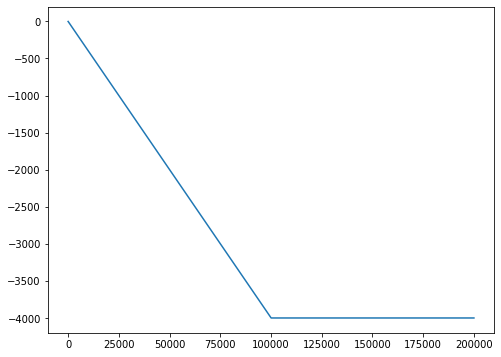

In [186]:
plt.plot(dd[3],dd[4])

In [4]:
pr = cProfile.Profile()
pr.enable()
run_sill()
pr.disable()

step 10000 completed: t = 1.2403635 s, dt = 0.0001277 s



In [5]:
p = pstats.Stats(pr)
p.strip_dirs().sort_stats('tottime').print_stats(20)

         127212777 function calls (117061916 primitive calls) in 78.236 seconds

   Ordered by: internal time
   List reduced from 1458 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
10094343/621929   11.463    0.000   27.612    0.000 copy.py:132(deepcopy)
  2423792    5.955    0.000   13.429    0.000 Grid1DCartesian.py:141(__getitem__)
  4121925    5.462    0.000    5.462    0.000 {built-in method numpy.array}
   574056    4.815    0.000    4.815    0.000 minfunc.py:7(minmin)
   574056    4.568    0.000    9.383    0.000 minfunc.py:18(minmod)
   143514    3.754    0.000   26.653    0.000 ShallowWaterSim.py:221(_find_uL_uR)
   669768    3.585    0.000    6.135    0.000 Grid1DCartesian.py:41(set_value)
4066440/3492384    2.586    0.000    6.291    0.000 {method '__deepcopy__' of 'numpy.ndarray' objects}
  5405974    2.513    0.000    3.355    0.000 copy.py:252(_keep_alive)
    15946    2.301    0.000   73.113    0.005 ShallowWaterS

In [47]:
import matplotlib.animation as animation

In [7]:
frames = []


NameError: name 'ls' is not defined

In [15]:
ls ../../output_sill/figs

plot_step_000000.pdf  plot_step_006549.pdf  plot_step_012815.pdf
plot_step_001674.pdf  plot_step_008118.pdf  plot_step_014381.pdf
plot_step_003331.pdf  plot_step_009685.pdf  plot_step_015946.pdf
plot_step_004977.pdf  plot_step_011250.pdf


In [19]:
files_mysim = np.sort(os.listdir(path='../../output_sill/files'))

In [7]:

for ii in np.sort(files):
    dd = read_data('../../output_sill/files/' + ii)
    fig = plt.figure()
    plt.plot(dd[3],dd[5],'-',label='surface')
    plt.plot(dd[3],dd[4],'-',label='bottom')
    plt.ylim((-1.05,0.105))
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/'+ii[:-4]+'.jpg')
    plt.close()

In [15]:
os.makedirs("../figs_PyClaw", exist_ok=True)

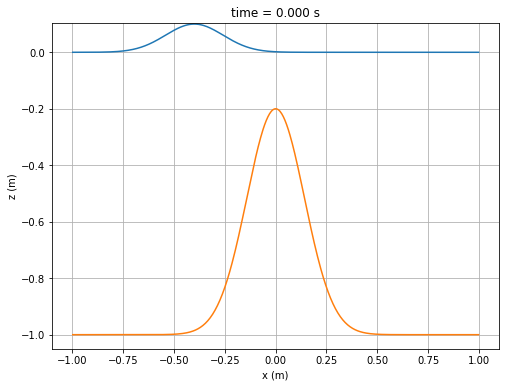

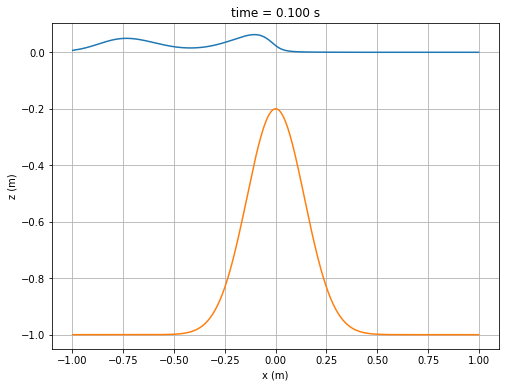

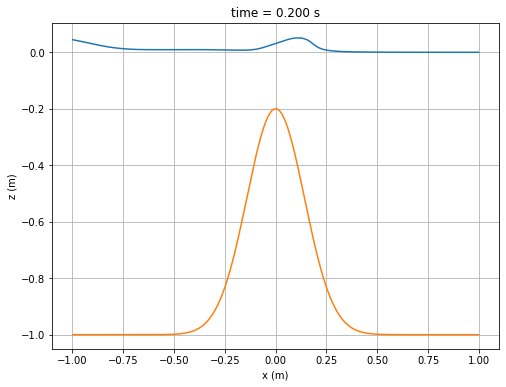

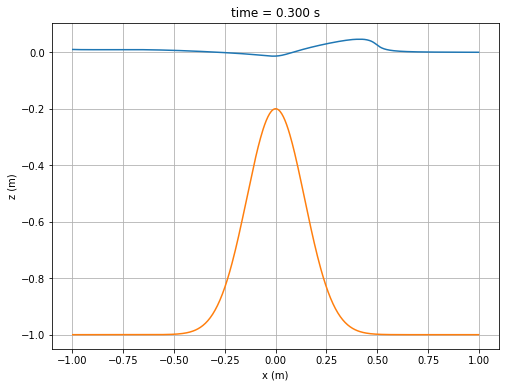

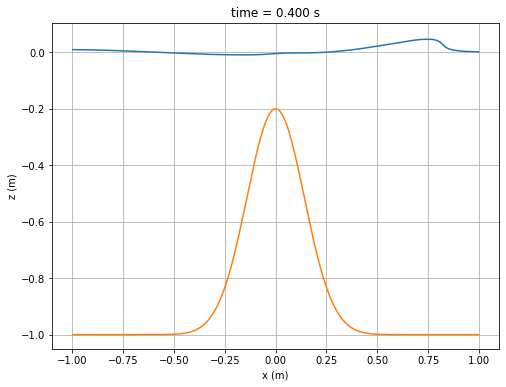

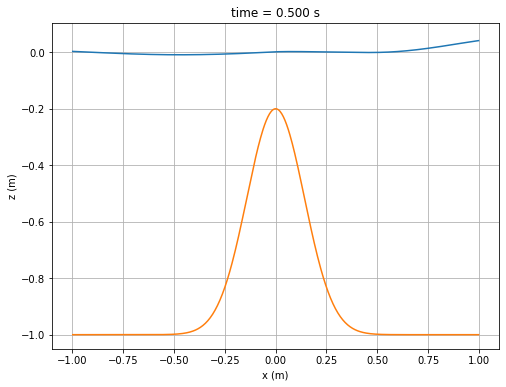

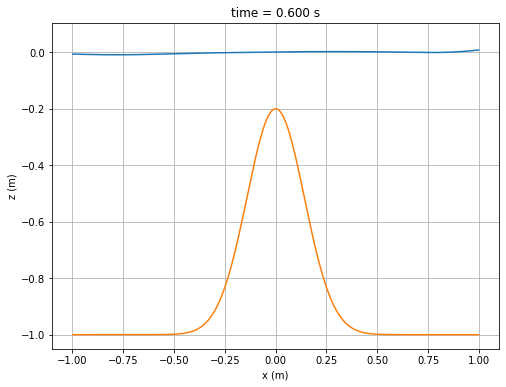

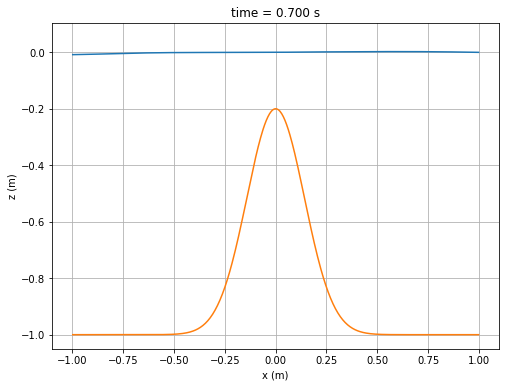

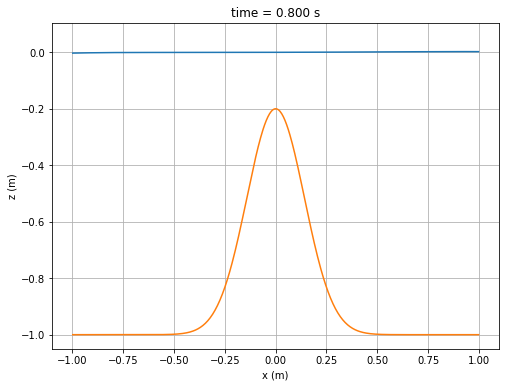

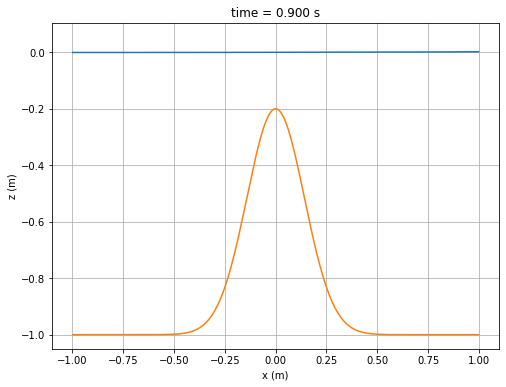

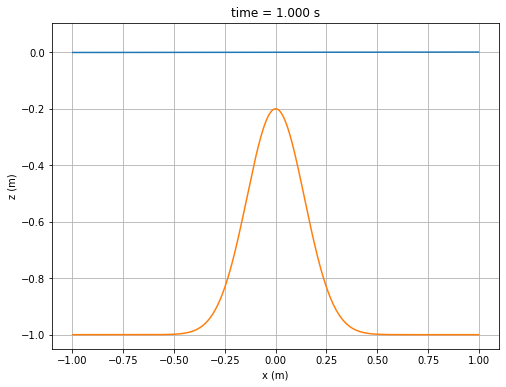

In [20]:
path_sill_clawpack = '../../clawpack/_output_sill/'
files = os.listdir(path=path_sill_clawpack)
bata = np.genfromtxt('../../clawpack/_output_sill/fort.a0000', skip_header = 6)
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    plt.plot(x, data[:,0]+bata, '-', label='surface')
    plt.plot(x, bata, '-', label='bottom')
    plt.ylim((-1.05,0.105))
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % (0.1 * ii))
    plt.grid()
    plt.savefig('../figs_PyClaw/'+files_mysim[ii][:-4]+'.jpg')
    plt.show()

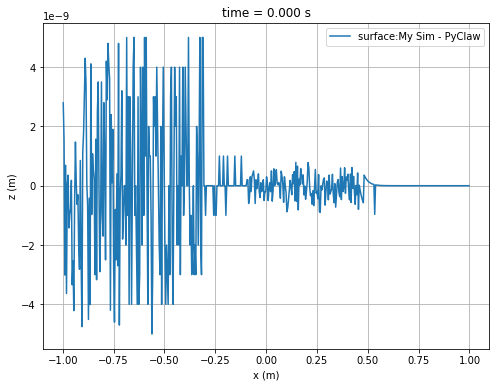

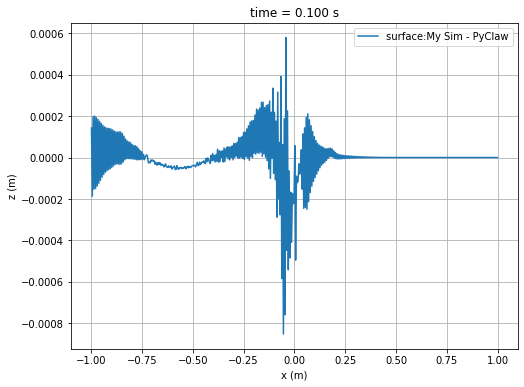

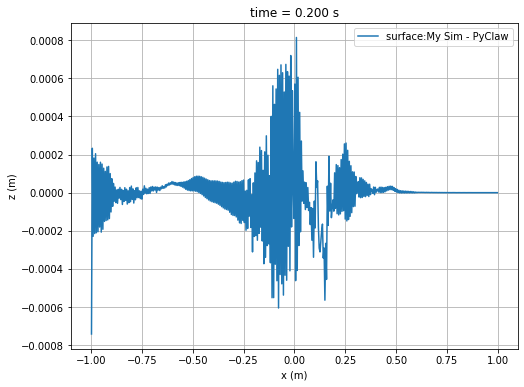

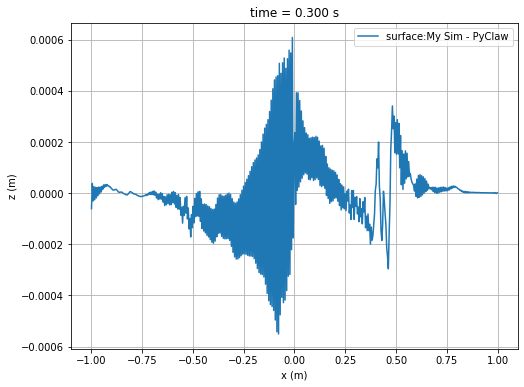

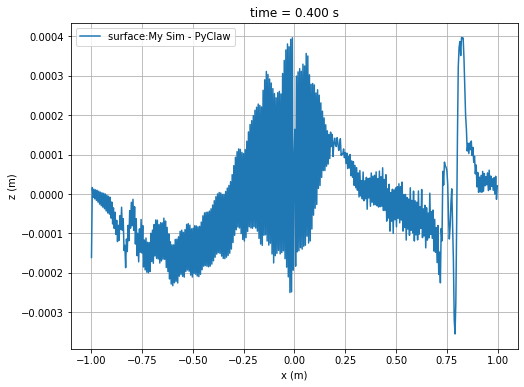

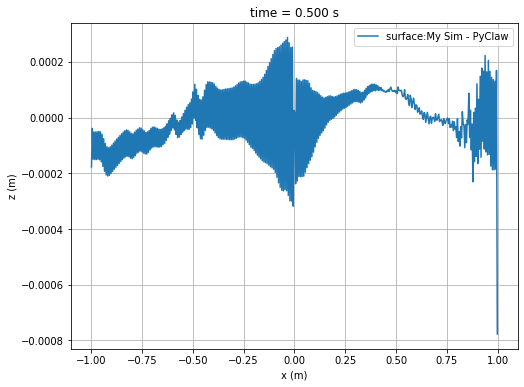

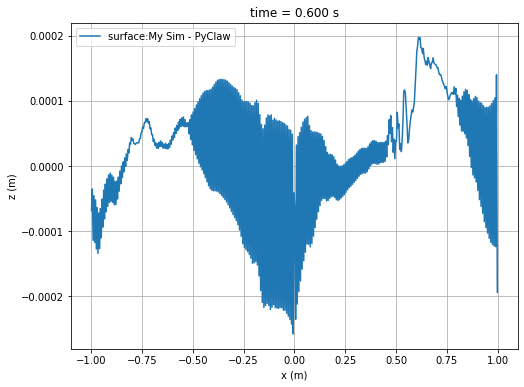

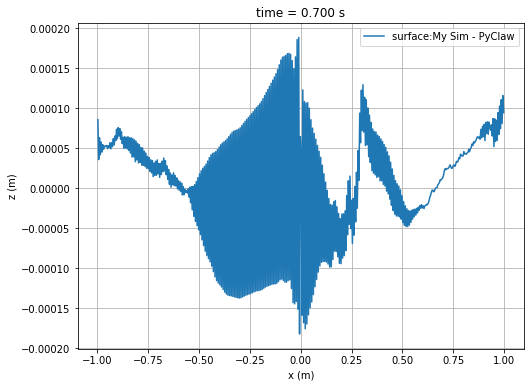

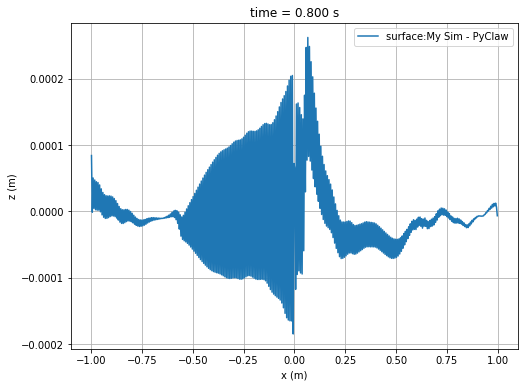

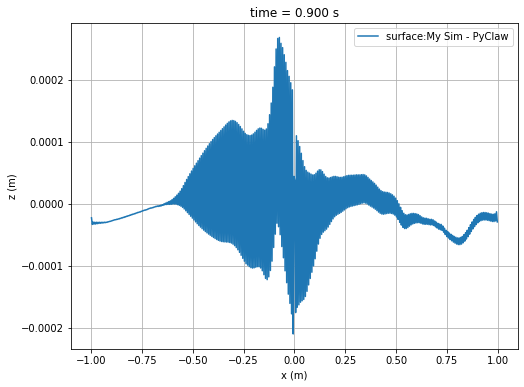

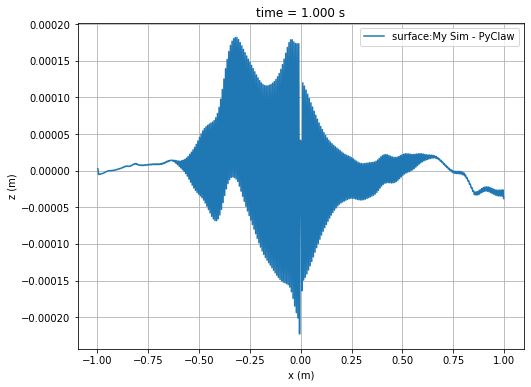

In [23]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data('../../output_sill/files/' + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[5] - (data[:,0]+bata),'-',label='surface:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/'+np.sort(files_mysim)[ii][:-4]+'_surface.jpg')
    plt.show()

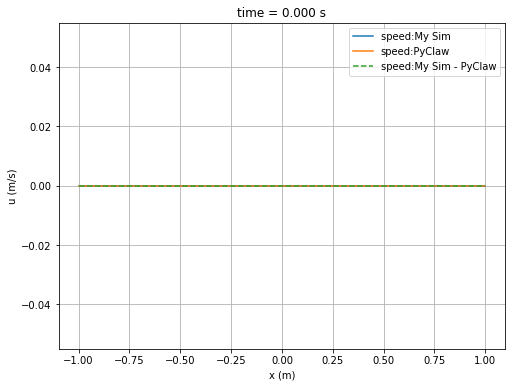

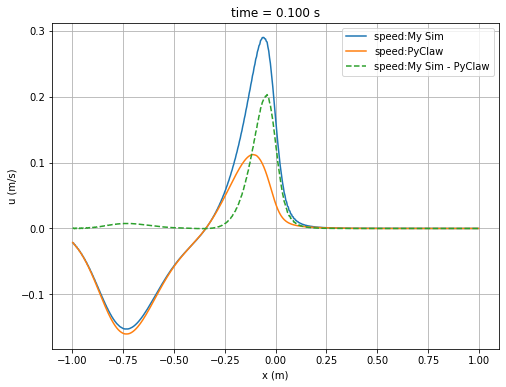

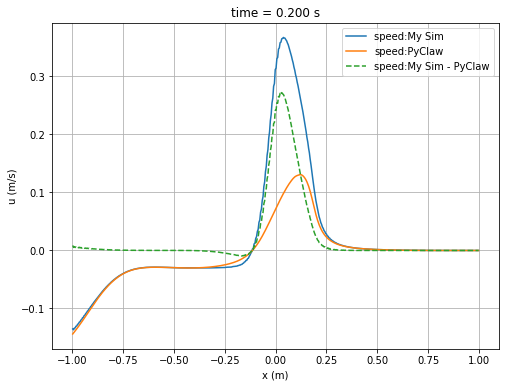

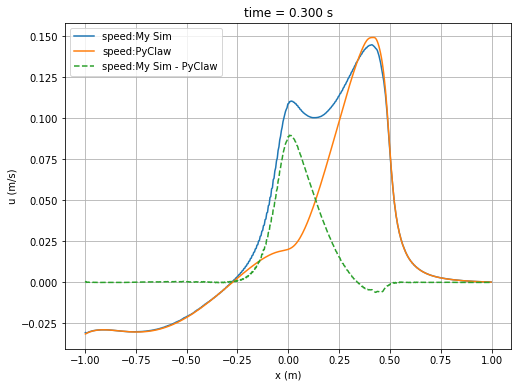

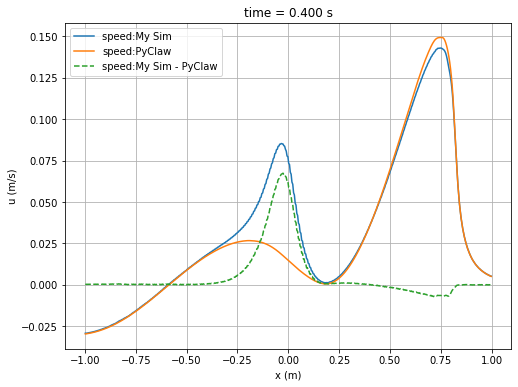

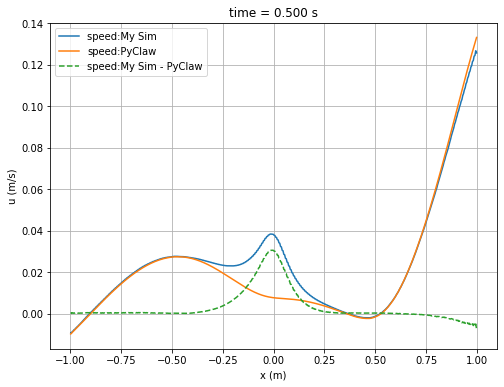

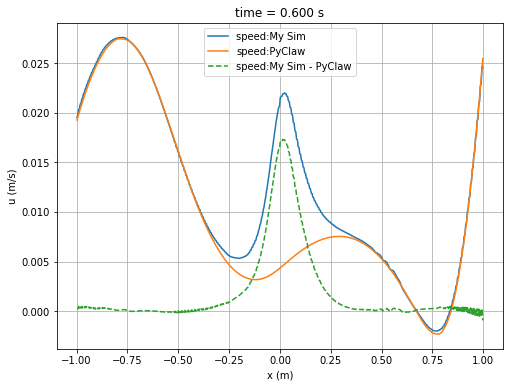

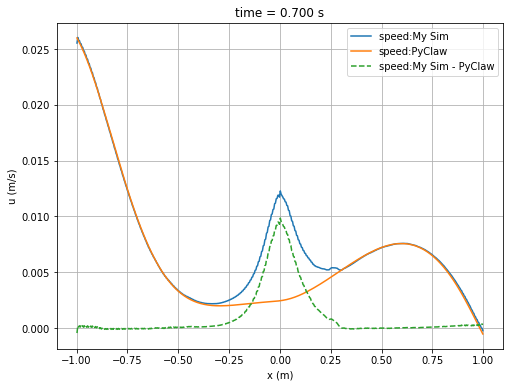

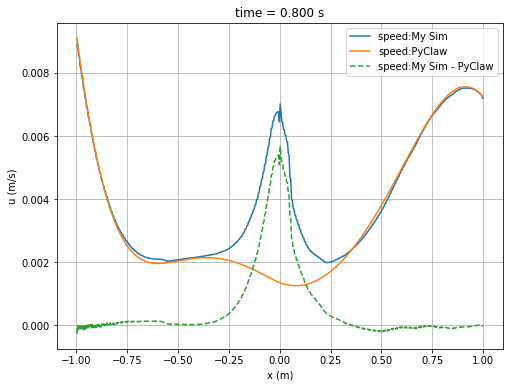

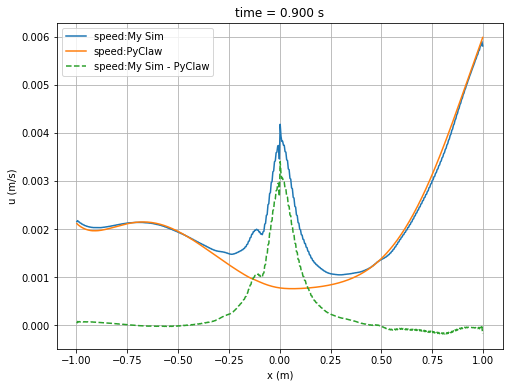

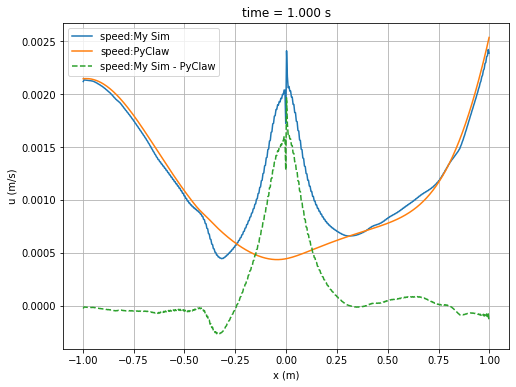

In [36]:
for ii, file  in enumerate(np.sort(files)[12:23]):
    # CLAWPACK
    data = np.genfromtxt(path_sill_clawpack + file, skip_header = 6)
    x = np.linspace(-1,1,501)
    x = (x[1:]+x[:-1])/2
    #SHALLOWWATERSIM
    dd = read_data('../../output_sill/files/' + np.sort(files_mysim)[ii])
    fig = plt.figure()
    plt.plot(dd[3],dd[6],'-',label='speed:My Sim')
    plt.plot(dd[3],data[:,1],'-',label='speed:PyClaw')
    plt.plot(dd[3],dd[6] - data[:,1],'--',label='speed:My Sim - PyClaw')
    plt.legend()
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.title('time = %.3f s' % dd[1])
    plt.grid()
    plt.savefig('../figs/'+np.sort(files_mysim)[ii][:-4]+'speed.jpg')
    plt.show()

### Simple Advection Problem

In [12]:
# define grid points
xmin = 0
xmax = 1
N = 200
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -1 * (x ** 0)

# initial water surface
s = 1 * np.exp(- (x-0.3)**2 / (2 * 0.05**2)) + 0
where = np.where(np.abs(x - 0.7) <= 0.1)
s[where] = 1

# initial speed
u = x * 0 + 1

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 0

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_simple/'

times = np.arange(0.1,1.1,0.1)

problem = 'passive'
interp_scheme = fifth_order_upwind
limiter = interp_SuHu5

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

In [13]:
path = '../output_simple_5u_SuHu5/files/'
files = np.sort(os.listdir(path=path))
files

array(['data_000000.txt', 'data_000200.txt', 'data_000400.txt',
       'data_000600.txt', 'data_000800.txt', 'data_001000.txt',
       'data_001201.txt', 'data_001401.txt', 'data_001601.txt',
       'data_001801.txt', 'data_002001.txt'], dtype='<U15')

In [14]:
dd0 = read_data(path + files[0])
dd1 = read_data(path + files[-1])

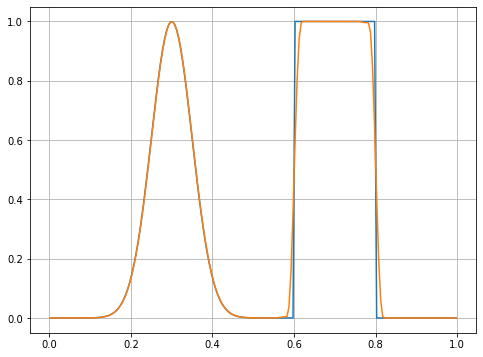

In [15]:
plt.plot(dd0[3], dd0[5], label = 'initial')
plt.plot(dd1[3], dd1[5], label = '1-cycle')
plt.grid()

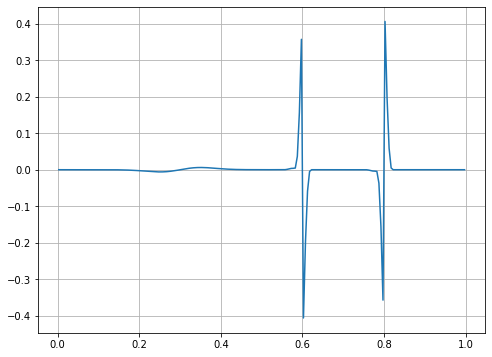

In [16]:
plt.plot(dd0[3], dd1[5]-dd0[5], label = 'difference')
plt.grid()

In [35]:
# Measure errors (for the passive advection problem).
#
# For passive advection, after 1 time period, the solution
# should exaclty overlay the initial condition.  Use this 
# to compute errors. Use various error norms.
#
# (Note: high order accuracy expected only for smooth initial conditions.)
#
def err_comp(u,u_init,x):
    err_rms = np.sqrt(np.mean((u-u_init)**2))
    mag = np.sqrt(np.mean(u_init**2))
    err_1 = np.mean(abs(u-u_init))
    err_max = max(abs(u-u_init))
    
    print("rel err_rms, mag=", err_rms/mag, mag)
    print("rel err_1       =", err_1/mag)
    print("err_max         =", err_max)
    print("most negative (or min) u =",  u[np.argmin(u)], "at x=", x[np.argmin(u)])
    print('')
    return err_rms/mag, err_max, err_1/mag

In [36]:
e1, e2, e3 = err_comp(dd1[5], dd0[5], dd0[3])

rel err_rms, mag= 0.009723715341618101 0.2976956367101904
rel err_1       = 0.00442077490457701
err_max         = 0.013193229999999945
most negative (or min) u = 9.3258734e-15 at x= 0.6725



### Simple Advection Problem with space dependent speed

In [17]:
# define grid points
xmin = 0
xmax = 1
N = 200
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -1 * (x ** 0)

# initial water surface
s = 1 * np.exp(- (x-0.3)**2 / (2 * 0.05**2)) + 0
#where = np.where(np.abs(x - 0.7) <= 0.1)
#s[where] = 1

# initial speed
u = 1 + 0.5 * np.sin(2 * np.pi * x) 

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 0

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_diff_speed/'

times = np.linspace(0,1.1547005383792512,11)[1:]

problem = 'passive'
interp_scheme = fifth_order_upwind
limiter = interp_SuHu5

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)

In [18]:
path = '../output_diff_speed/files/'
files = np.sort(os.listdir(path=path))
files

array(['data_000000.txt', 'data_000347.txt', 'data_000693.txt',
       'data_001040.txt', 'data_001386.txt', 'data_001732.txt',
       'data_002079.txt', 'data_002425.txt', 'data_002772.txt',
       'data_003118.txt', 'data_003464.txt'], dtype='<U15')

In [19]:
dd0 = read_data(path + files[0])
dd1 = read_data(path + files[-1])

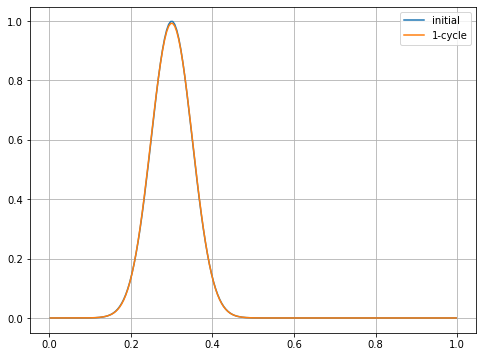

In [20]:
plt.plot(dd0[3], dd0[5], label = 'initial')
plt.plot(dd1[3], dd1[5], label = '1-cycle')
plt.grid()
plt.legend()

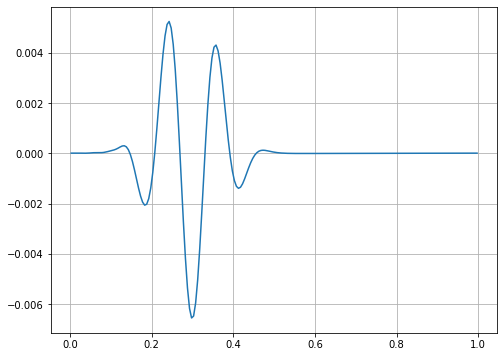

In [21]:
plt.plot(dd0[3], dd1[5]-dd0[5], label = 'difference')
plt.grid()

In [38]:
# integrates a function using 5-point Gauss-Legendre Quadrature
def boundGLQ5(func, a, b, npts):
    # define grid points
    x = np.linspace(a, b, npts)
    # grid spacing
    h = x[1] - x[0]
    
    # Gauss-Legendre nodes within a grid
    glnodes = 1/3 * np.array([-np.sqrt(5+2*np.sqrt(10/7)), \
                              -np.sqrt(5-2*np.sqrt(10/7)), \
                              0, \
                              np.sqrt(5-2*np.sqrt(10/7)), \
                              np.sqrt(5+2*np.sqrt(10/7))])
    # Gauss-Legendre weights
    glweights = np.array([(322-13*np.sqrt(70)) / 900, \
                          (322+13*np.sqrt(70)) / 900, \
                          128 / 225, \
                          (322+13*np.sqrt(70)) / 900, \
                          (322-13*np.sqrt(70)) / 900])
    
    # computes the integral of a subdomain and adds up together
    A = 0
    for ii in range(np.size(x)-1):
        x_center = (x[ii+1] + x[ii]) / 2
        x_range = (x[ii+1] - x[ii]) / 2
        xgl = x_center + (glnodes * x_range)
        # factor h/2 comes from changing of variable
        A = A + h/2 * (np.sum(glweights * func(xgl)))
    
    return A, h

In [53]:
def func(x):
    f = 1 / (1 + 0.5 * np.sin(2 * np.pi * x))
    return f

In [54]:
t = boundGLQ5(func, 0, 1, 200)
t

(1.1547005383792512, 0.005025125628140704)

In [27]:
tank._hGrid._u

array([1.00000002, 1.00000004, 1.00000007, 1.00000012, 1.0000002 ,
       1.00000035, 1.00000061, 1.00000103, 1.00000174, 1.0000029 ,
       1.00000478, 1.0000078 , 1.00001261, 1.00002017, 1.00003195,
       1.00005011, 1.00007781, 1.00011961, 1.00018205, 1.00027431,
       1.00040922, 1.00060441, 1.00088383, 1.00127955, 1.00183401,
       1.00260259, 1.0036565 , 1.00508607, 1.00700417, 1.00954966,
       1.01289069, 1.01722747, 1.02279418, 1.02985957, 1.03872577,
       1.04972487, 1.0632127 , 1.07955951, 1.09913725, 1.12230345,
       1.14938178, 1.18063985, 1.21626517, 1.25634015, 1.30081795,
       1.3495006 , 1.40202138, 1.45783336, 1.51620567, 1.57622907,
       1.63683161, 1.69680478, 1.7548396 , 1.80957165, 1.85963276,
       1.90370708, 1.94058806, 1.96923323, 1.98881304, 1.99875078,
       1.99875078, 1.98881304, 1.96923323, 1.94058806, 1.90370708,
       1.85963276, 1.80957165, 1.7548396 , 1.69680478, 1.63683161,
       1.57622907, 1.51620567, 1.45783336, 1.40202138, 1.34950

In [29]:
hGrid_flip = deepcopy(tank._hGrid)

In [31]:
hGrid_flip.set_value(np.flip(hGrid_flip.get_value('all')) , 'all')

In [32]:
hGrid_flip._u

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

NameError: name 'flip' is not defined

In [6]:
aa = np.array([[1,2,3],[4,5,6]])
aa

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
np.concatenate((aa[:,-1:],aa),axis=1)

array([[3, 1, 2, 3],
       [6, 4, 5, 6]])

In [1]:
aa[:,-1]

NameError: name 'aa' is not defined

In [11]:
# define grid points
xmin = -6
xmax = 6
N = 240
x = np.linspace(xmin, xmax, N+1)
x = (x[:-1] + x[1:]) / 2

# bathymetry
b = -0 * (x ** 0)

# initial water surface
s = 0.5 * np.exp(- x**2 / 0.35**2) + 1

# initial speed
u = x * 0

# boundary condition
bc = 'periodic'

# gravity acceleration 
g = 1

# initialize WaterWaveSim object
tank = ShallowWaterSim(x, b, s, u, g, bc)

CFL = 0.1

# preventing the simulation to run eternally when dt is too small
MAX_STEPS = 100000

output_directory = '../output_shallow_water/'

times = np.arange(0.1,3.1,0.1)

problem = 'shallowwater'
interp_scheme = third_order_upwind
limiter = interp_vanLeer3

tank.simulate(CFL, MAX_STEPS, times, problem, output_directory, interp_scheme, limiter)